In [1]:
# cd /Users/deniz/Documents/GitHub/Shockley-Queisser-limit

In [5]:
from SQlimit_engine import SQlimit_code as SQlimit
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)


SQ = SQlimit.SQlim(EQE_EL=0.001)

In [3]:
SQ = SQlimit.SQlim(EQE_EL=1)
SQ.available_E([0.85,1.62])


(          WL         Solar  Eg=0.85       Eg=1.62
 0      280.0  4.730900e-23      0.0  1.300297e-23
 1      281.0  5.689500e-21      0.0  1.569355e-21
 2      282.0  1.194600e-18      0.0  3.306833e-19
 3      283.0  1.845200e-17      0.0  5.125905e-18
 4      284.0  7.267000e-16      0.0  2.025882e-16
 ...      ...           ...      ...           ...
 3716  3996.0  7.188860e-03      0.0  0.000000e+00
 3717  3997.0  7.167720e-03      0.0  0.000000e+00
 3718  3998.0  7.146580e-03      0.0  0.000000e+00
 3719  3999.0  7.125440e-03      0.0  0.000000e+00
 3720  4000.0  7.104300e-03      0.0  0.000000e+00
 
 [3721 rows x 4 columns],
 [13.854977169529244, 30.21049420060211],
 44.065471370131355)

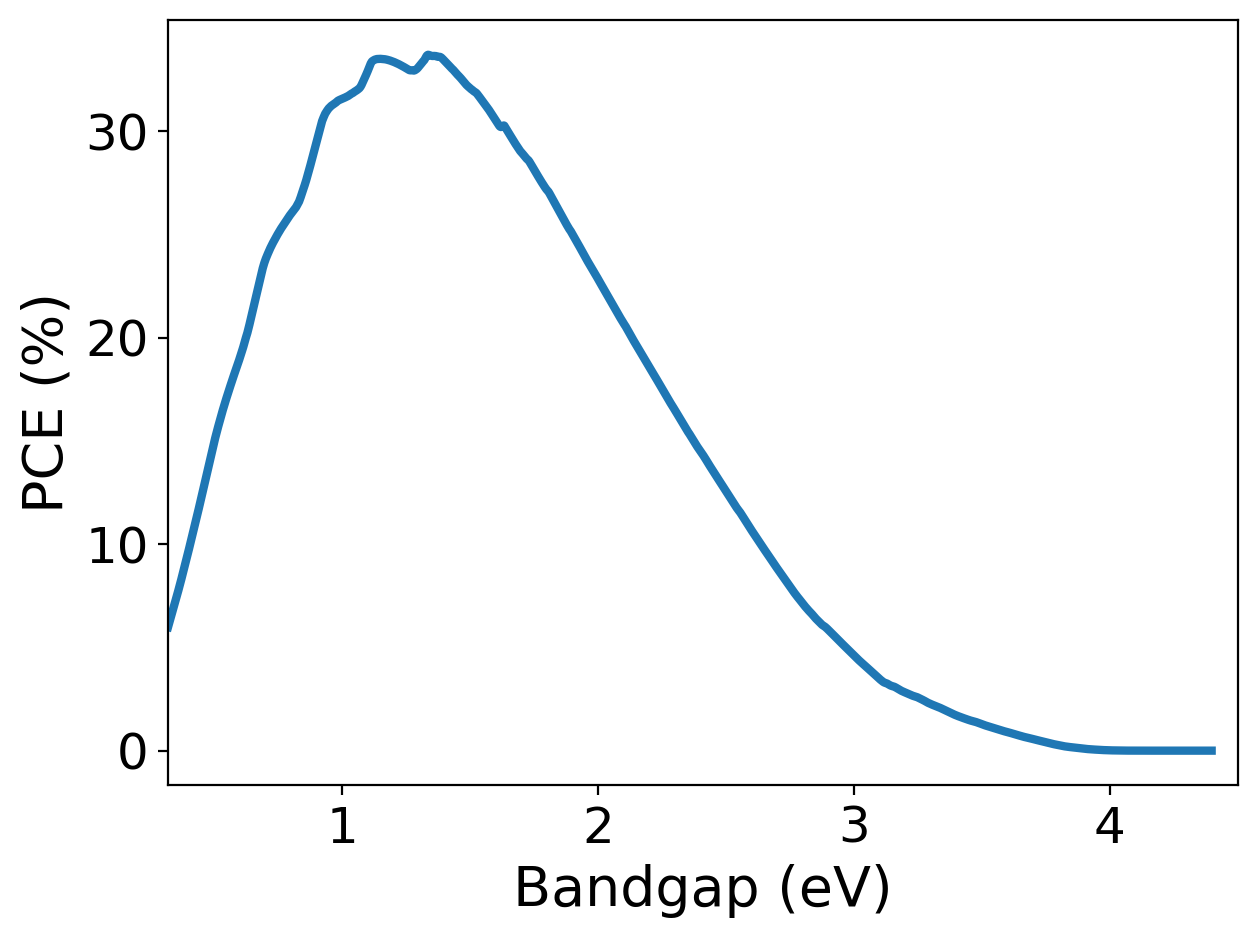

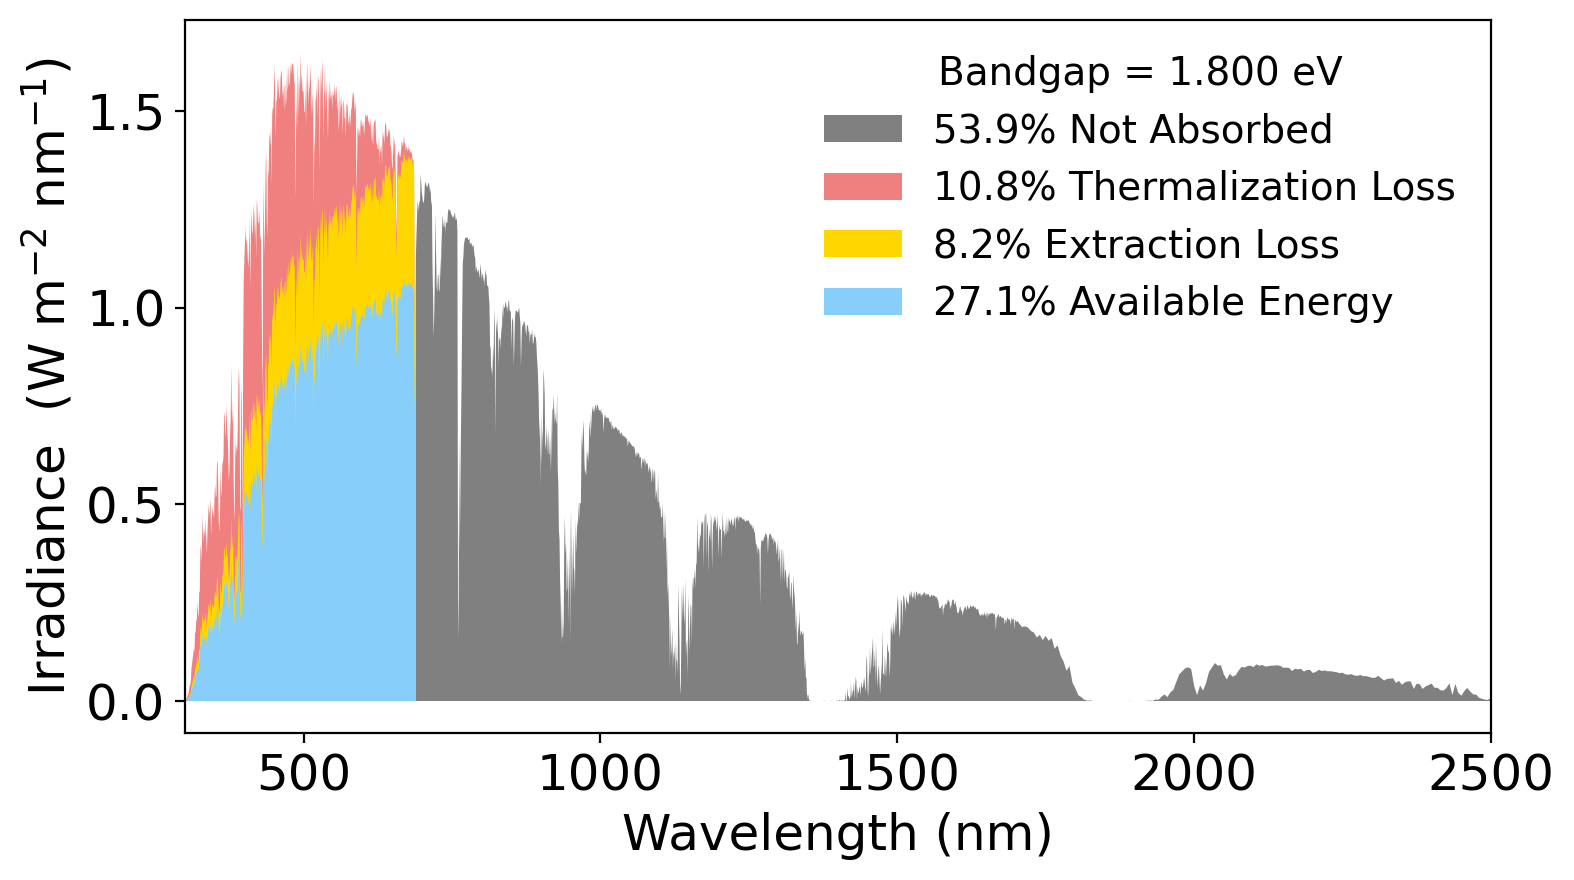

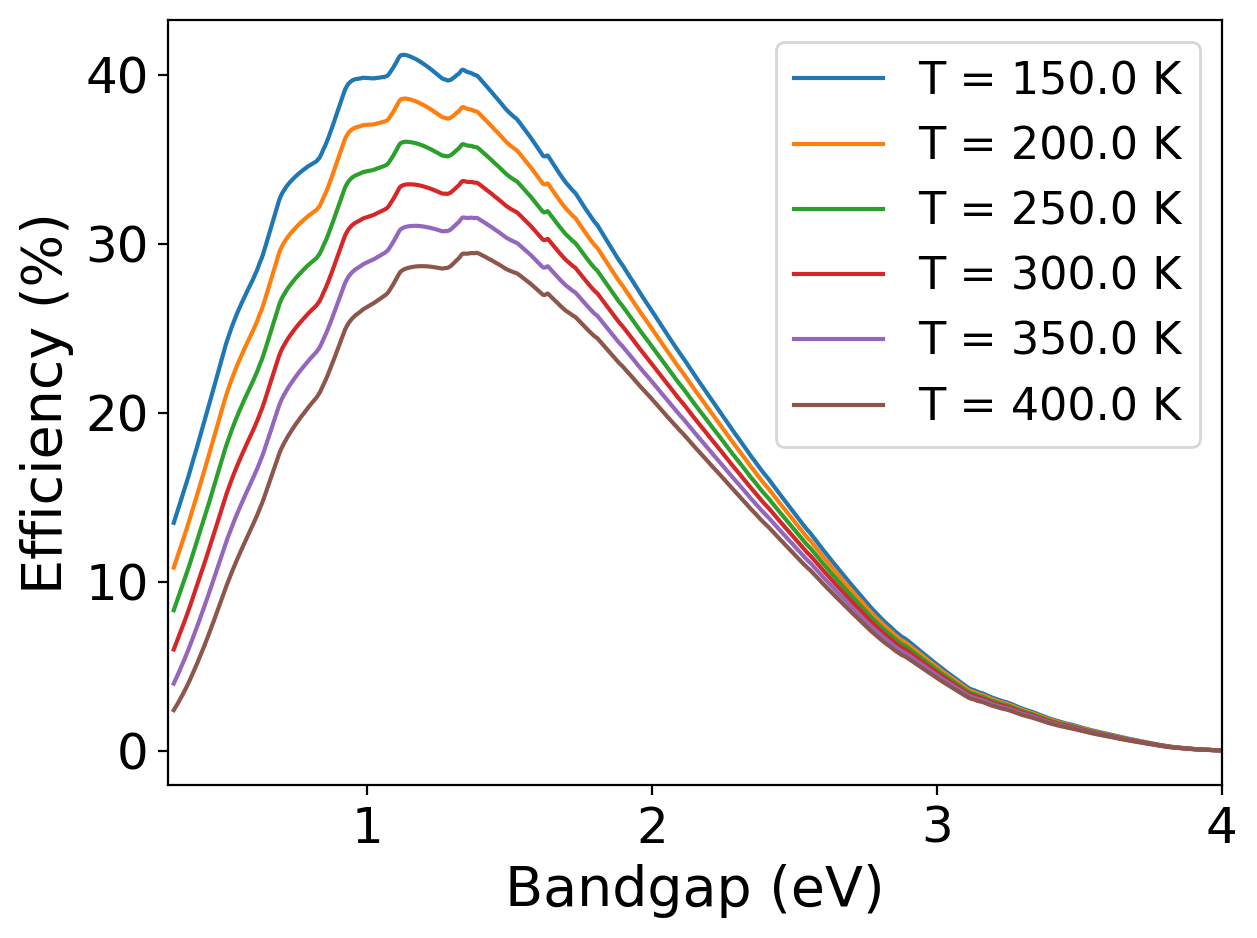

[<SQlim: [T=150K]>,
 <SQlim: [T=200K]>,
 <SQlim: [T=250K]>,
 <SQlim: [standard]>,
 <SQlim: [T=350K]>,
 <SQlim: [T=400K]>]

In [4]:
SQ.plot('PCE')
SQ.E_loss(1.8)
SQlimit.SQlim.vary_temp(T=[150, 200, 250, 300, 350, 400])

In [5]:
#vary the lowest bandgap fixing the top two

bottomE = numpy.linspace(0.85,1.3,num=10,endpoint=True)
midE = 1.55
topE = 2.0
PCE_tot = []
for n,Eg in enumerate(bottomE):
    print(Eg)
    E_subcells, PCE, totE = SQ.available_E([Eg, midE,topE])
    PCE_tot.append(totE)
plt.figure()
plt.plot(bottomE,PCE_tot)

0.85
0.9
0.95
1.0
1.05
1.1
1.15
1.2000000000000002
1.25
1.3


/Users/deniz/Documents/GitHub/Shockley-Queisser-limit/SQlimit_engine/SQlimit_code.py:129: RuntimeWarning: invalid value encountered in double_scalars
  PCE.append(-1 * np.min(J*V) / self.intensity)


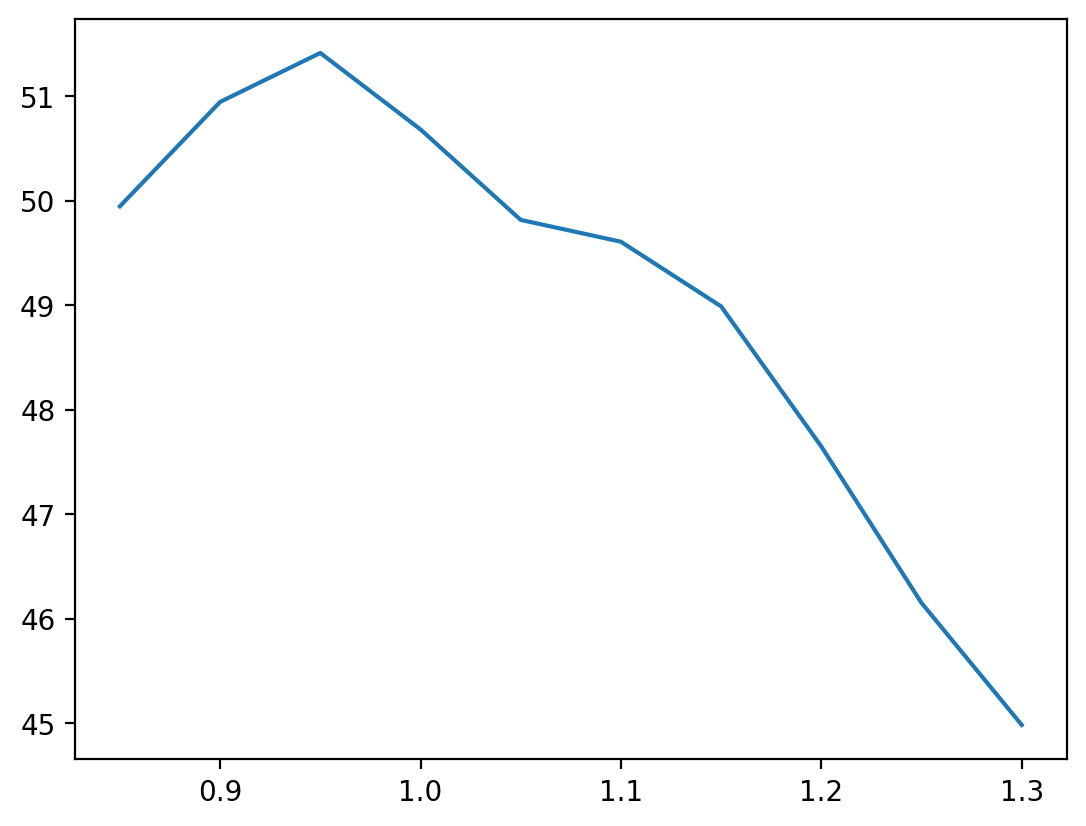

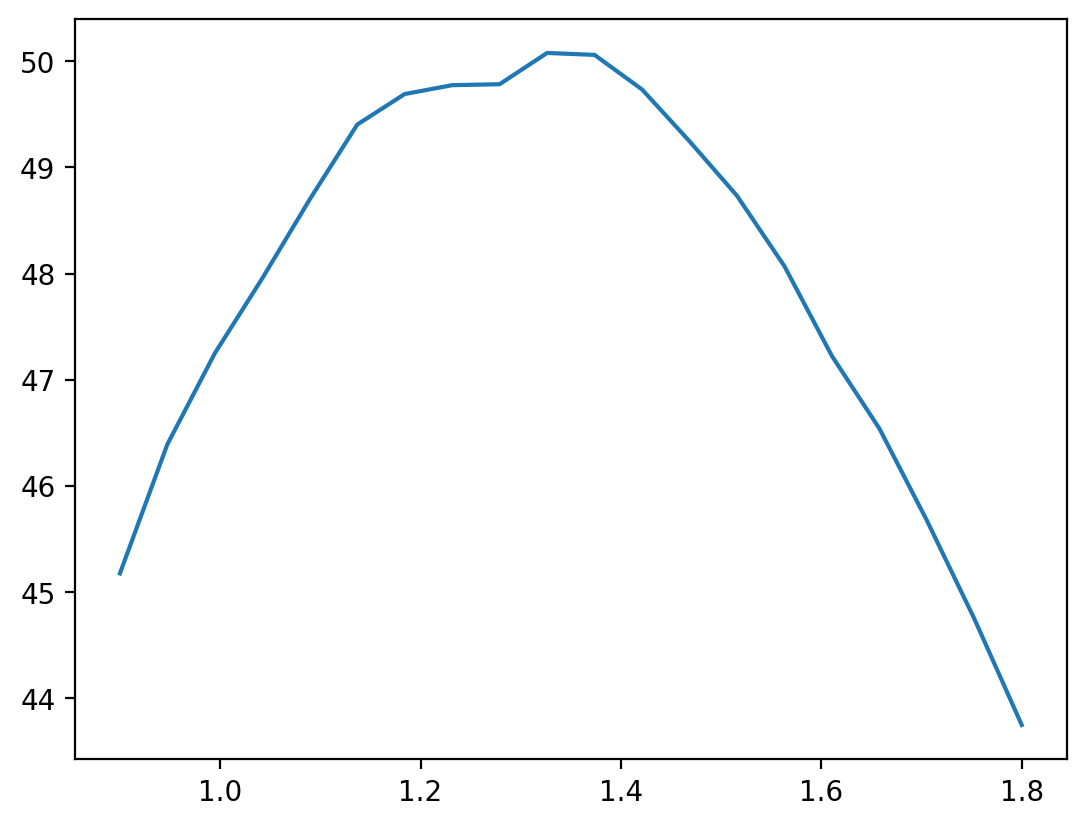

In [6]:
#fix the lowest bandgap, vary the middle, fix the top

bottomE = 0.85
topE = 1.8
midE = numpy.linspace(0.9,topE,num=20,endpoint=True)

PCE_tot = []
for n,Eg in enumerate(midE):
    
    E_subcells, PCE, totE = SQ.available_E([bottomE, Eg,topE])
    PCE_tot.append(totE)
plt.figure()
plt.plot(midE,PCE_tot)
plt.show()

/Users/deniz/Documents/GitHub/Shockley-Queisser-limit/SQlimit_engine/SQlimit_code.py:129: RuntimeWarning: invalid value encountered in double_scalars
  PCE.append(-1 * np.min(J*V) / self.intensity)


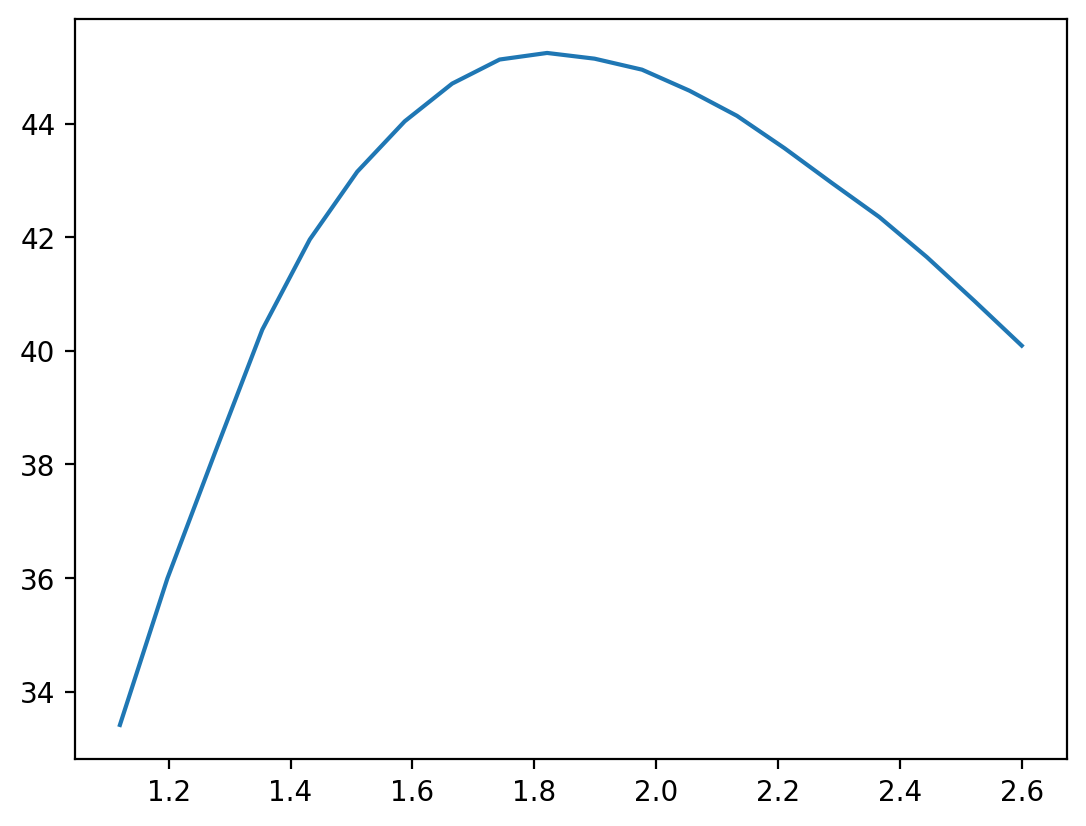

45.24392327534787
1.8210526315789475


In [7]:
#fix the lowest bandgap, fix the middle, vary the top

bottomE = 1.12
midE = 1.12
topE = numpy.linspace(midE,2.6,num=20,endpoint=True)

PCE_tot = []
for n,Eg in enumerate(topE):
    
    E_subcells, PCE, totE = SQ.available_E([bottomE, midE,Eg])
    PCE_tot.append(totE)
plt.figure()
plt.plot(topE,PCE_tot)
plt.show()
print(numpy.max(PCE_tot))
print(topE[numpy.argmax(PCE_tot)])

In [8]:
#fix the lowest bandgap, vary the middle and top

bottomEg = 0.85
topLim = 2.4
nSteps = 5;
midE = numpy.linspace(0.9,topLim,num=nSteps,endpoint=True)

PCE_tot = numpy.zeros((nSteps,nSteps))
X =    numpy.zeros((nSteps,nSteps))
Y = numpy.zeros((nSteps,nSteps))

for n,midEg in enumerate(midE):
    topE = numpy.linspace(midEg,topLim,num=nSteps,endpoint=True)
    for m,topEg in enumerate(topE):
        E_subcells, PCE, totE = SQ.available_E([bottomEg, midEg,topEg])
        PCE_tot[m,n] = totE
        X[m,n] = midEg
        Y[m,n] = topEg
        #print(midEg, topEg, totE)

/Users/deniz/Documents/GitHub/Shockley-Queisser-limit/SQlimit_engine/SQlimit_code.py:129: RuntimeWarning: invalid value encountered in double_scalars
  PCE.append(-1 * np.min(J*V) / self.intensity)


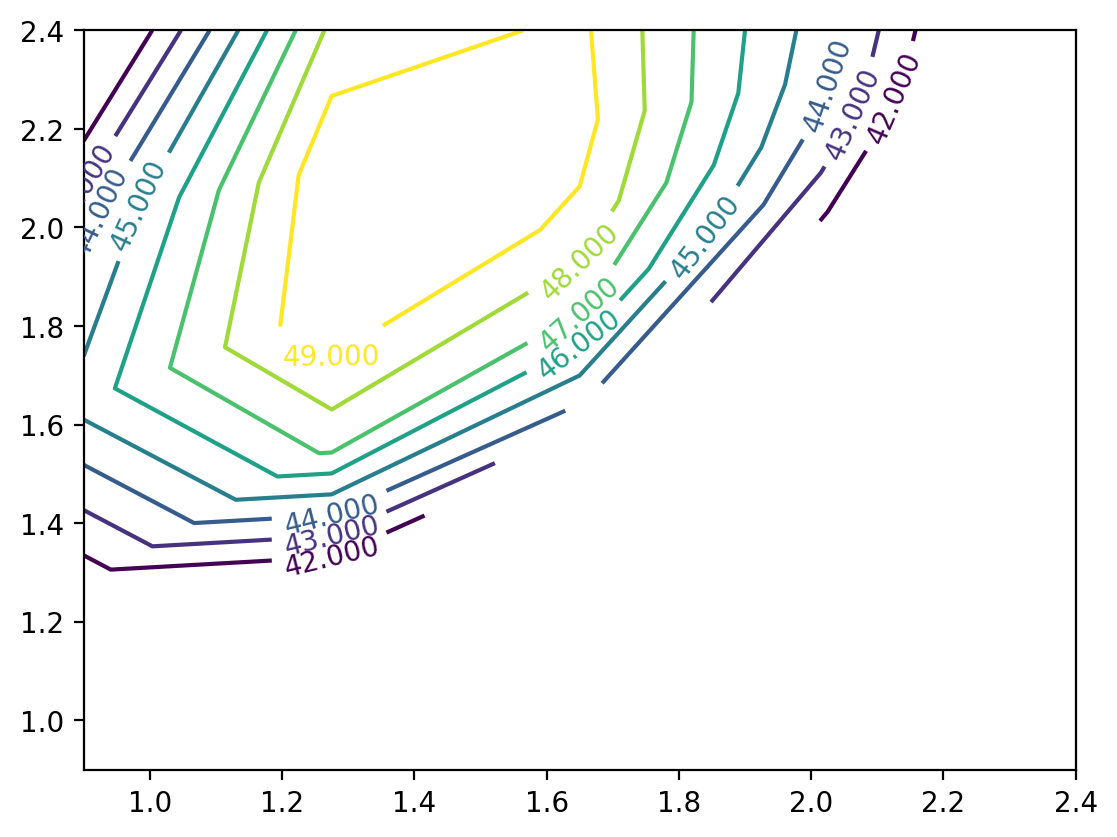

In [9]:
fig, ax = plt.subplots()
cs = ax.contour(X,Y,PCE_tot, numpy.arange(42,50,1))
ax.clabel(cs,inline=1,fontsize=10)
ax.grid(b=True,which='minor',axis='both')
plt.show()

In [4]:
#Single junction limit 
nSteps = 10;
Eg = numpy.linspace(1.1,2.0,num=nSteps,endpoint=True)
PCE = numpy.zeros(nSteps)

NameError: name 'numpy' is not defined

In [11]:
# 2T triple junction analysis
botE = 0.85 #numpy.linspace(0.85,1.3,num=10,endpoint=True)
topLim = 2.2
nSteps = 10;
midEg = numpy.linspace(1.1,topLim,num=nSteps,endpoint=True)

TwoT_PCE = numpy.zeros((nSteps,nSteps))
X =    numpy.zeros((nSteps,nSteps))
Y = numpy.zeros((nSteps,nSteps))
lim_gap = numpy.zeros((nSteps,nSteps))
TwoT_SQ = SQlimit.SQlim(EQE_EL=1)

#index and value of the bandgaps in Es
botE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-botE))
botVoc   = TwoT_SQ.get_paras(botE,False)["Voc"]
print(botVoc)

for n,midE in enumerate(midEg):
    midE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-midE))
    topEg = numpy.linspace(midE,topLim,num=nSteps,endpoint=True)
    
    for m,topE in enumerate(topEg):
        topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))

        TwoT_SQ = SQlimit.SQlim(EQE_EL=1e-2)
        #determine the subcell currents
        top_current = TwoT_SQ.get_paras(topE,False)["Jsc"]
        mid_current = TwoT_SQ.get_paras(midE,False)["Jsc"]-top_current
        bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current-mid_current

        #reset the Jsc's to match the limiting current 
        TwoT_SQ.Jsc[:] = min([top_current, mid_current, bot_current])
        lim_gap[m,n] = numpy.argmin([top_current, mid_current, bot_current])+1

        #calculate the PCEs (without recalculating the SQ current) and sum
        TwoT_SQ.calculate(calc_current=False)
        TwoT_PCE[m,n] = numpy.sum([TwoT_SQ.PCE[botE_idx[0]],TwoT_SQ.PCE[midE_idx[0]],TwoT_SQ.PCE[topE_idx[0]]])
        
        X[m,n] = midE
        Y[m,n] = topE
        
        #print(midE, topE, TwoT_PCE[m,n])
        


0.6250790274603808


/Users/deniz/Documents/GitHub/Shockley-Queisser-limit/SQlimit_engine/SQlimit_code.py:88: RuntimeWarning: invalid value encountered in true_divide
  self.FF = self.PCE / (self.Voc*self.Jsc) * 100.0 * self.intensity


[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 1. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 1. 1. 2. 2. 2. 2. 2. 2.]
 [3. 1. 1. 1. 1. 2. 2. 2. 2. 2.]
 [3. 1. 1. 1. 1. 1. 2. 2. 2. 2.]]


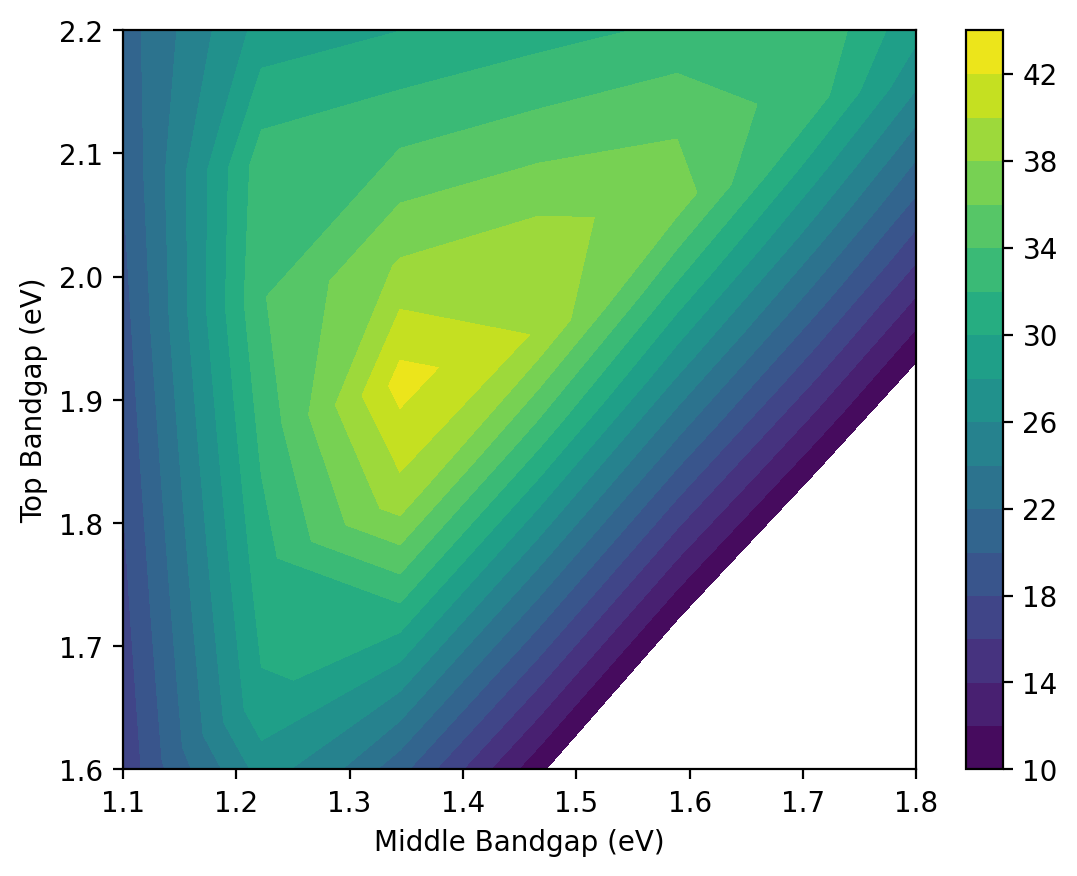

In [12]:
fig, ax = plt.subplots()
cs = ax.contourf(X,Y,TwoT_PCE, numpy.arange(10,45,2))
plt.xlabel("Middle Bandgap (eV)")
plt.ylabel("Top Bandgap (eV)")
plt.xlim([1.1,1.8])
plt.ylim([1.6,2.2])
#ax.clabel(cs,inline=1,fontsize=10)
fig.colorbar(cs)
ax.grid(b=True,which='minor',axis='both')
print(lim_gap)
numpy.amax(TwoT_PCE)
plt.show()

## Manually set top cell current to simulate TMM results

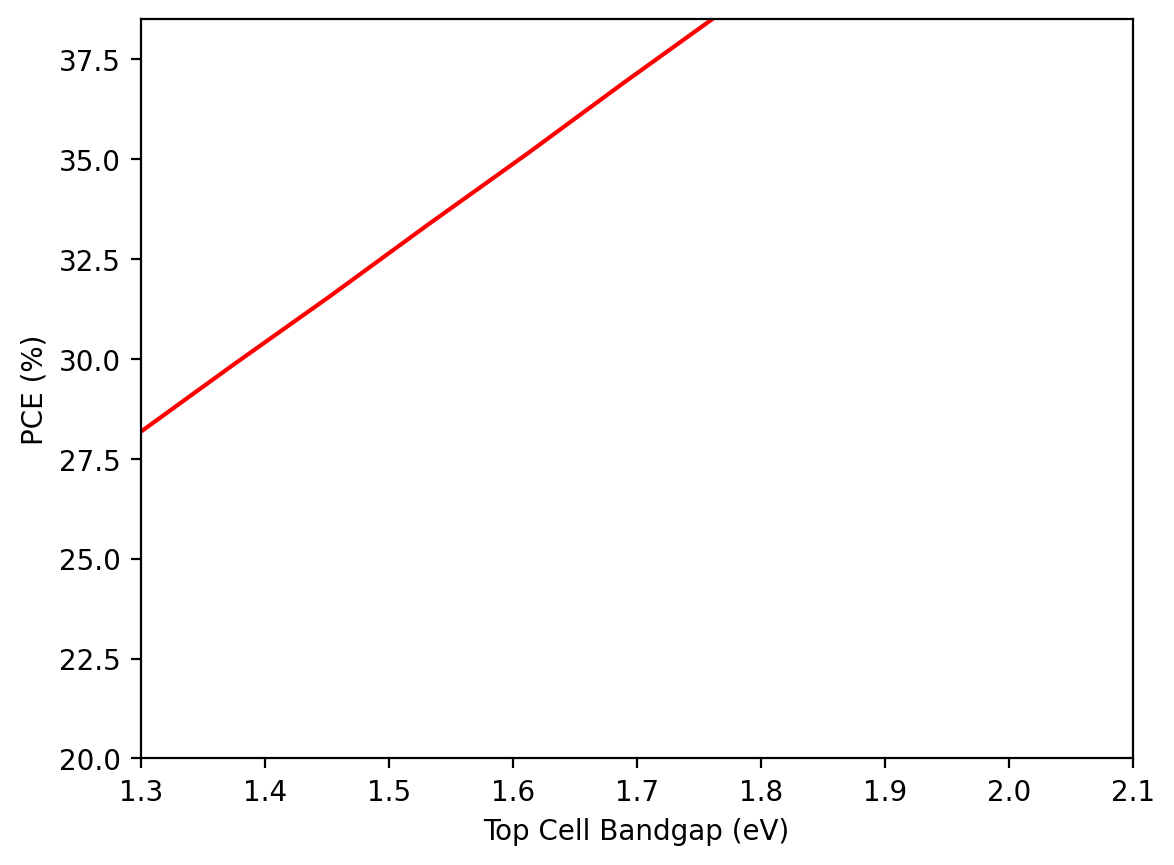

In [9]:
# two-terminal tandem analysis
setEQE_EL = 1e-2;

botE = 0.85 #np.linspace(0.85,1.3,num=10,endpoint=True)
topEg =  np.linspace(0.9,2.4,num=20,endpoint=True)
TwoT_PCE = np.zeros(len(topEg))

#index and value of the bandgaps in Es
TwoT_SQ = SQlimit.SQlim(EQE_EL=1)
botE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-botE))

# PCEfig = plt.figure()
# ax = plt.gca()

for n,topE in enumerate(topEg):
    topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))

    TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
    #determine the subcell currents
    top_current = 23.75 #TwoT_SQ.get_paras(topE,False)["Jsc"]
    bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current 
        
    #reset the Jsc's to match the limiting current 
    TwoT_SQ.Jsc[:] = min([top_current, bot_current])

    #calculate the PCEs (without recalculating the SQ current) and sum
    TwoT_SQ.calculate(calc_current=False)
    TwoT_PCE[n] = np.sum([TwoT_SQ.PCE[botE_idx[0]],TwoT_SQ.PCE[topE_idx[0]]])
        
plt.plot(topEg,TwoT_PCE,color='red')


#matplotlib.pyplot.vlines([1.5,1.61,1.68], 0, 40, colors='darkgray',linestyles='dashdot')
plt.xlabel("Top Cell Bandgap (eV)")
plt.ylabel("PCE (%)")
plt.xlim(1.3,2.1)
plt.ylim(20,38.5)
plt.show()

## Limits for 2T Tandem for 1.2 eV bottom cell with 1% EQE_EL

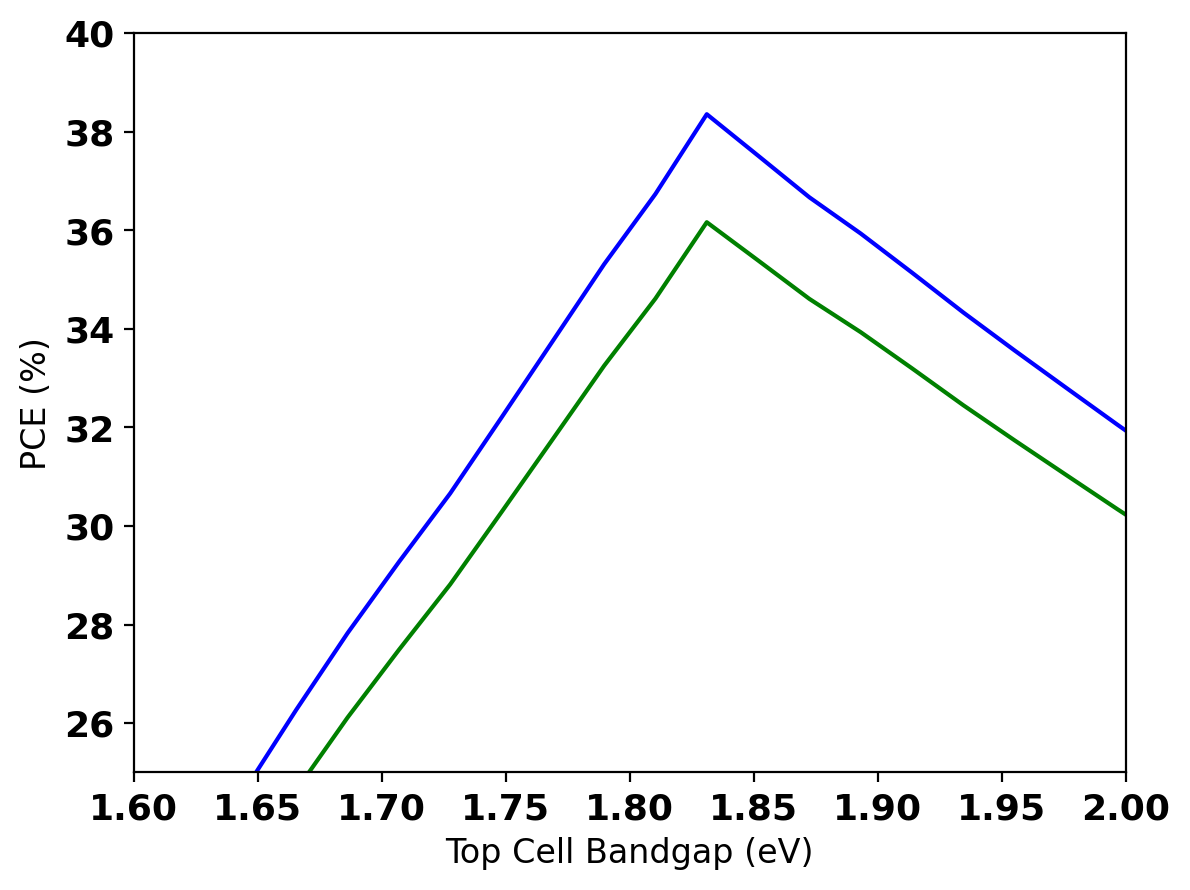

In [54]:
# two-terminal tandem analysis


#bottom cell band gap is fixed to:
botE = 1.25 #np.linspace(0.85,1.3,num=10,endpoint=True)

topEg =  np.linspace(1.5,2.1,num=30,endpoint=True)
TwoT_PCE = np.zeros(len(topEg))

#index and value of the bandgaps in Es
TwoT_SQ = SQlimit.SQlim(EQE_EL=1)
botE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-botE))

#changing EQE_EL to 1e-2
setEQE_EL = 1e-2;

for n,topE in enumerate(topEg):
    topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))

    TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
    #determine the subcell currents
    top_current = TwoT_SQ.get_paras(topE,False)["Jsc"]
    bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current 
        
    #reset the Jsc's to match the limiting current 
    TwoT_SQ.Jsc[:] = min([top_current, bot_current])

    #calculate the PCEs (without recalculating the SQ current) and sum
    TwoT_SQ.calculate(calc_current=False)
    TwoT_PCE[n] = np.sum([TwoT_SQ.PCE[botE_idx[0]],TwoT_SQ.PCE[topE_idx[0]]])
    
PCEfig = plt.figure()
ax = plt.gca()
plt.plot(topEg,TwoT_PCE,color='blue', label='EQE EL=1e-2')

# changing EQE EL to 1e-4
setEQE_EL = 1e-4;
for n,topE in enumerate(topEg):
    
    #determine the subcell currents
    TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
    top_current = TwoT_SQ.get_paras(topE,False)["Jsc"]
    TwoT_SQ = SQlimit.SQlim(EQE_EL=1e-2)
    bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current 
    
    #reset the Jsc's to match the limiting current 
    TwoT_SQ.Jsc[:] = min([top_current, bot_current])

    #calculate the PCEs (without recalculating the SQ current) and sum
    TwoT_SQ.calculate(calc_current=False)
    botPCE = TwoT_SQ.PCE[botE_idx[0]]
    
    TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
    TwoT_SQ.Jsc[:] = min([top_current, bot_current])
    topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))
    TwoT_SQ.calculate(calc_current=False)
    topPCE = TwoT_SQ.PCE[topE_idx[0]]
                         
    TwoT_PCE[n] = botPCE + topPCE
                         
plt.plot(topEg,TwoT_PCE,color='green', label='EQE EL=1e-4')
#matplotlib.pyplot.vlines([1.5,1.61,1.68], 0, 40, colors='darkgray',linestyles='dashdot')
plt.xlabel("Top Cell Bandgap (eV)")
plt.ylabel("PCE (%)")
# plt.title('Bottom cell fixed to '+ str(botE)+'eV')
ax.set_xlim(1.6,2)
ax.set_ylim(25,40)
# ax.legend()


mpl.rc('xtick', labelsize=13) 
mpl.rc('ytick', labelsize=13) 


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

mpl.rc('font', **font)


#triple_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-1.67))
# plt.scatter(1.67, 26.8, s=60, marker='o', c='black')
# plt.scatter(1.73, 29, s=250, marker='|', c='red')
# plt.scatter(1.86, 35, s=250, marker='|', c='red')

# plt.savefig("TwoTerminalTandemLimit_1p2eV", dpi=300)
plt.show()

# convert this into a funciton, inputs would be EL=number, Botcell=egap

## Comparing 2T Tandems with two different bottom cell gaps

/Users/deniz/Documents/GitHub/Shockley-Queisser-limit/SQlimit_engine/SQlimit_code.py:121: RuntimeWarning: invalid value encountered in log
  return (k*self.T/q) * np.log((self.Jsc/self.J0) + 1)


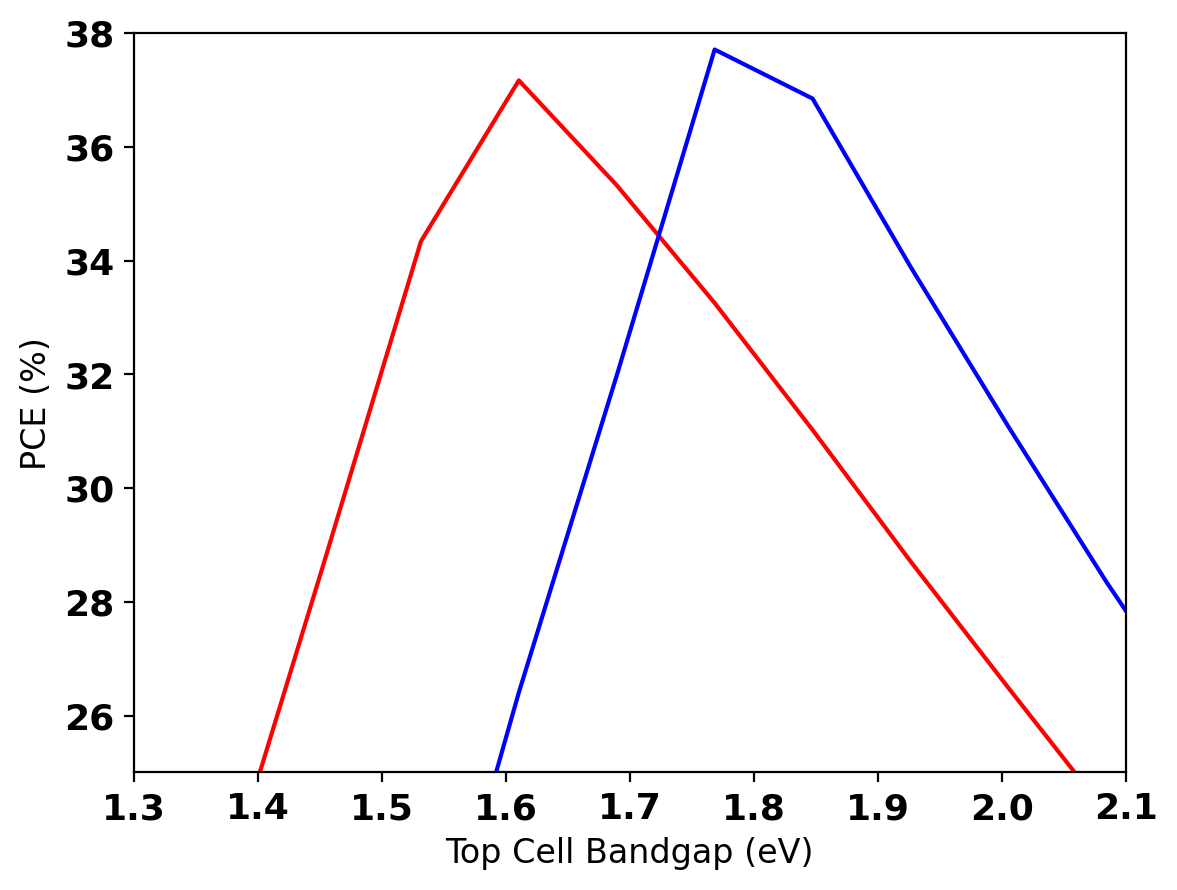

In [57]:
# two-terminal tandem analysis
setEQE_EL = .01;

botE = 0.85 #np.linspace(0.85,1.3,num=10,endpoint=True)
topEg =  np.linspace(0.9,2.4,num=20,endpoint=True)
TwoT_PCE = np.zeros(len(topEg))

#index and value of the bandgaps in Es
TwoT_SQ = SQlimit.SQlim(EQE_EL=1)
botE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-botE))

PCEfig = plt.figure()
ax = plt.gca()

for n,topE in enumerate(topEg):
    topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))

    TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
    #determine the subcell currents
    top_current = TwoT_SQ.get_paras(topE,False)["Jsc"]
    bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current 
        
    #reset the Jsc's to match the limiting current 
    TwoT_SQ.Jsc[:] = min([top_current, bot_current])

    #calculate the PCEs (without recalculating the SQ current) and sum
    TwoT_SQ.calculate(calc_current=False)
    TwoT_PCE[n] = np.sum([TwoT_SQ.PCE[botE_idx[0]],TwoT_SQ.PCE[topE_idx[0]]])
        
plt.plot(topEg,TwoT_PCE,color='red', label=str(botE)+'eV')


botE = 1.2 #np.linspace(0.85,1.3,num=10,endpoint=True)
topEg =  np.linspace(0.9,2.4,num=20,endpoint=True)
TwoT_PCE = np.zeros(len(topEg))

#index and value of the bandgaps in Es
TwoT_SQ = SQlimit.SQlim(EQE_EL=1)
botE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-botE))

for n,topE in enumerate(topEg):
    topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))

    TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
    #determine the subcell currents
    top_current = TwoT_SQ.get_paras(topE,False)["Jsc"]
    bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current 
        
    #reset the Jsc's to match the limiting current 
    TwoT_SQ.Jsc[:] = min([top_current, bot_current])

    #calculate the PCEs (without recalculating the SQ current) and sum
    TwoT_SQ.calculate(calc_current=False)
    TwoT_PCE[n] = np.sum([TwoT_SQ.PCE[botE_idx[0]],TwoT_SQ.PCE[topE_idx[0]]])
plt.plot(topEg,TwoT_PCE,color='blue', label=str(botE)+'eV')


# botE = 1.1 #np.linspace(0.85,1.3,num=10,endpoint=True)
# topEg =  np.linspace(0.9,2.4,num=20,endpoint=True)
# TwoT_PCE = np.zeros(len(topEg))

# #index and value of the bandgaps in Es
# TwoT_SQ = SQlimit.SQlim(EQE_EL=1)
# botE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-botE))

# for n,topE in enumerate(topEg):
#     topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))

#     TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
#     #determine the subcell currents
#     top_current = TwoT_SQ.get_paras(topE,False)["Jsc"]
#     bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current 
        
#     #reset the Jsc's to match the limiting current 
#     TwoT_SQ.Jsc[:] = min([top_current, bot_current])

#     #calculate the PCEs (without recalculating the SQ current) and sum
#     TwoT_SQ.calculate(calc_current=False)
#     TwoT_PCE[n] = np.sum([TwoT_SQ.PCE[botE_idx[0]],TwoT_SQ.PCE[topE_idx[0]]])
# plt.title('Bottom cell Egap affecting PCE'+' with EQE EL='+str(setEQE_EL))
# plt.plot(topEg,TwoT_PCE,color='green', label=str(botE)+'eV')



# plt.title('EQE EL='+str(setEQE_EL)+' Bottom cell Egap affecting PCE')



#matplotlib.pyplot.vlines([1.5,1.61,1.68], 0, 40, colors='darkgray',linestyles='dashdot')
plt.xlabel("Top Cell Bandgap (eV)")
plt.ylabel("PCE (%)")
# plt.legend()
ax.set_xlim(1.3,2.1)
ax.set_ylim(25,38)

mpl.rc('xtick', labelsize=13) 
mpl.rc('ytick', labelsize=13) 


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

mpl.rc('font', **font)

plt.show()

In [37]:
# two-terminal tandem analysis
setEQE_EL = 1e-2;

# PCEfig = plt.figure()
# ax = plt.gca()

#remove k loop to run single plots
for k in range(0,len(botE_array)):
    
    botE=botE_array[k]

    # botE = 0.85 #numpy.linspace(0.85,1.3,num=10,endpoint=True)
    botE_array = np.linspace(0.85,1.3,num=10,endpoint=True)

    topEg =  numpy.linspace(0.9,2.4,num=20,endpoint=True)
    TwoT_PCE = numpy.zeros(len(topEg))

    #index and value of the bandgaps in Es
    TwoT_SQ = SQlimit.SQlim(EQE_EL=1)
    botE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-botE))    
    
    
    for n,topE in enumerate(topEg):
        topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))

        TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
        #determine the subcell currents
        top_current = TwoT_SQ.get_paras(topE,False)["Jsc"]
        bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current 

        #reset the Jsc's to match the limiting current 
        TwoT_SQ.Jsc[:] = min([top_current, bot_current])

        #calculate the PCEs (without recalculating the SQ current) and sum
        TwoT_SQ.calculate(calc_current=False)
        TwoT_PCE[n] = numpy.sum([TwoT_SQ.PCE[botE_idx[0]],TwoT_SQ.PCE[topE_idx[0]]])

    plt.plot(topEg,TwoT_PCE, label=str(botE)+'eV')



'''
#another plot
botE = 1.2 #numpy.linspace(0.85,1.3,num=10,endpoint=True)
topEg =  numpy.linspace(0.9,2.4,num=20,endpoint=True)
TwoT_PCE = numpy.zeros(len(topEg))

#index and value of the bandgaps in Es
TwoT_SQ = SQlimit.SQlim(EQE_EL=1)
botE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-botE))

for n,topE in enumerate(topEg):
    topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))

    TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
    #determine the subcell currents
    top_current = TwoT_SQ.get_paras(topE,False)["Jsc"]
    bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current 
        
    #reset the Jsc's to match the limiting current 
    TwoT_SQ.Jsc[:] = min([top_current, bot_current])

    #calculate the PCEs (without recalculating the SQ current) and sum
    TwoT_SQ.calculate(calc_current=False)
    TwoT_PCE[n] = numpy.sum([TwoT_SQ.PCE[botE_idx[0]],TwoT_SQ.PCE[topE_idx[0]]])
plt.title('EQE EL='+str(setEQE_EL)+' Bottom cell Egap affecting PCE')
plt.plot(topEg,TwoT_PCE,color='blue', label=str(botE)+'eV')

# another plot
botE = 1.1 #numpy.linspace(0.85,1.3,num=10,endpoint=True)
topEg =  numpy.linspace(0.9,2.4,num=20,endpoint=True)
TwoT_PCE = numpy.zeros(len(topEg))

#index and value of the bandgaps in Es
TwoT_SQ = SQlimit.SQlim(EQE_EL=1)
botE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-botE))

for n,topE in enumerate(topEg):
    topE_idx = min(enumerate(TwoT_SQ.Es),key=lambda x: abs(x[1]-topE))

    TwoT_SQ = SQlimit.SQlim(EQE_EL=setEQE_EL)
    #determine the subcell currents
    top_current = TwoT_SQ.get_paras(topE,False)["Jsc"]
    bot_current = TwoT_SQ.get_paras(botE,False)["Jsc"]-top_current 
        
    #reset the Jsc's to match the limiting current 
    TwoT_SQ.Jsc[:] = min([top_current, bot_current])

    #calculate the PCEs (without recalculating the SQ current) and sum
    TwoT_SQ.calculate(calc_current=False)
    TwoT_PCE[n] = numpy.sum([TwoT_SQ.PCE[botE_idx[0]],TwoT_SQ.PCE[topE_idx[0]]])
    
        
plt.plot(topEg,TwoT_PCE,color='green', label=str(botE)+'eV')
'''


#matplotlib.pyplot.vlines([1.5,1.61,1.68], 0, 40, colors='darkgray',linestyles='dashdot')
plt.title('Bottom cell Egap affecting PCE'+' with EQE EL='+str(setEQE_EL))
plt.xlabel("Top Cell Bandgap (eV)")
plt.ylabel("PCE (%)")
plt.legend()
plt.xlim(1.3,2.1)
plt.ylim(25,40)
plt.show()

NameError: name 'botE_array' is not defined